# **Regresión Logistica**

En este cuaderno (Laboratorio 1) vamos a explorar el modelo de regresión logistica visto en las lecciones del curso [Deep Learning y Redes Neuronales](https://), utilizando la arquitectura del perceptron simple. La regresión logistica es uno de los modelos mas simples para realizar tareas de clasificación, y es el primer paso para comenzar a comprender la redes neuronales y su funcionamiento.

## **Objetivos**

* Implementar un modelo de regresión logistica sobre una serie de datos en 2D.
* Comprender como realizar la optimizacion del modelo por medio del algoritmo de gradiente descendente.
* Graficar la frontera de decisión para visualizar y mejorar la comprensión de como el modelo clasifica los datos.
* Realizar una implementacion vectorizada del modelo de regresión logistica.
* Comprender las limitaciones del modelo de regresión logistica.
* Explorar como utilizar la estructura del perceptron simple para realizar regresión lineal.

Para comenzar importaremos algunas liberias utilizadas para la implementación. Scikit-Learn o sklearn nos servira para generar nuestros datasets de manera aleatoria y poder experimentar con ellos; matplotlib nos sera util para la visualización de los datos y numpy sera utilizado para el manejo de matrices y vectores.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Una vez cargadas las librerias vamos a crear aleatoriamente un dataset de prueba con 100 elementos, este dataset consiste en 2 clases definidas por 2 valores o caracteristicas. Para comprender mejor graficamos los datos.

El tamaño de X es: (100, 2)
El tamaño de Y es: (100,)


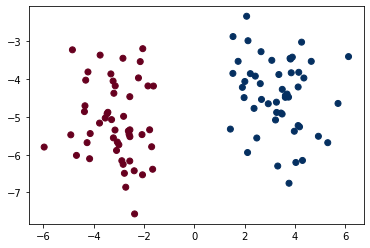

In [2]:
X, Y = datasets.make_blobs(n_samples=100, centers=2) # Crea un dataset de prueba en 2D para clasificacion binaria

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
plt.show()

Una vez generados los datos que vamos a clasificar procedemos a configurar la estructura del modelo y las reglas de aprendizaje del mismo. Inicalmente realizamos la combinación lineal de los pesos y entredas, ademas de esto añadimos el termino del bias. Luego pasamos este resultado por la funcion de activacion sigmoidal para encontrar la probabilidad de una clase dada una entrada $\hat{y} = a = P(\hat{y}|x)$.

<center>

$z = (\sum_{i=1}^{n_x} w_i x_i) + b$

$a = \sigma(z) = \frac{1}{1 + e^{-z}}$

</center>

Una vez configurado el modelo se define una funcion de perdida para optimizar el modelo, y con base a esta funcion se define una funcion de costo que tiene en cuenta todos los ejemplos de entrenamiento.

<center>

$L(a, y) = -(y\log{(a)} + (1 - y)\log{(1 - a)})$

$J(W, b) = \frac{1}{m} \sum_{i=1}^m L(a^{\langle i \rangle}, y^{\langle i \rangle})$

</center>

A partir de esta funcion de costo se pueden definir las reglas de entrenamiento para los pesos $w_i$ y el bias $b$.

<center>

$w_i = w_i - \alpha \frac{\partial J}{\partial w_i};\quad i = 1,...,n_x$

$b = b - \alpha \frac{\partial J}{\partial b}$

</center>

Para encontrar los gradientes de los pesos $w_i$ se puede realizar las derivadas parciales correspondientes de la siguiente manera.

<center>

$\frac{\partial J}{\partial w_i} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial a}*\frac{\partial a}{\partial z}*\frac{\partial z}{\partial w_i}$

$\frac{\partial J}{\partial w_i} = \frac{1}{m} \sum_{i=1}^m (a^{\langle i \rangle} - y^{\langle i \rangle})x_i$

</center>

De igual forma para el bias $b$.

<center>

$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial a}*\frac{\partial a}{\partial z}*\frac{\partial z}{\partial b}$

$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{\langle i \rangle} - y^{\langle i \rangle})$

</center>

In [3]:
# Creamos la funcion que define nuestro modelo de regresión logistica
def logisticRegression(X, Y, t=100, alpha=0.1):

  # PARAMETROS DE ENTRADA
  # 'X' es la matriz de entrada y posee dimensiones de (m, n_x)
  # 'Y' es el vector de salidas de dimensiones (m, 1)
  # 't' corresponde al numero de iteraciones para el entrenamiento
  # 'alpha' corresponde a la tasa de aprendizaje para la actualizacion de los pesos

  m = X.shape[0] # Obtenemos el numero de ejemplos en el dataset

  # Inicializamos los pesos w1, w2 y el bias b
  w1 = 0
  w2 = 0
  b = 0

  # Inicializamos los gradientes de los pesos w1, w2 y b
  dw1 = 0
  dw2 = 0
  db = 0

  J = []

  # Realizamos cada una de las iteraciones de entrenamiento realizando gradiente descendente
  for i in range(t):

    cost = 0

    # Iteramos sobre los ejemplos de entrenamiento
    for j in range(m):

      z = w1*X[j,0] + w2*X[j,1] + b # Realizamos la combinacion lineal de las entradas y los pesos
      a = 1/(1 + np.exp(-z)) # Aplicamos funcion de activacion sigmoidal

      cost += -(Y[j]*np.log(a) + (1 - Y[j])*np.log(1 - a))

      dz = a - Y[j] # dL/dz
      dw1 += X[j,0]*dz # dL/dw1
      dw2 += X[j,1]*dz # dL/dw2
      db += dz # dJ/db

    # Promediamos sobre el numero de ejemplos de entrenamiento
    J.append(cost/m)
    dw1 = dw1/m
    dw2 = dw2/m
    db = db/m

    # Realizamos la actualizacion de los pesos
    w1 = w1 - alpha*dw1
    w2 = w2 - alpha*dw2
    b = b - alpha*db

    # La funcion dvuelve los pesos del modelo
  return w1, w2, b, J

In [4]:
# Creamos la funcion de prediccion de nuestro modelo
def predict(x, w1, w2, b):

  # PARAMETROS DE ENTRADA
  # 'x' matriz de entradas para realizar la predicciones
  # 'w1', 'w2' y 'b' son los pesos y el bias
  
  m = x.shape[0] # Cantidad de datos o ejemplos en los datos de entrada
  y_pred = np.zeros(m) # Inicializacion del vector de salida

  for i in range(m):
    z = w1*x[i,0] + w2*x[i,1] + b # Combinacion lineal entradas y pesos
    y_pred[i] = 1/(1 + np.exp(-z)) # Funcion de activacion sigmoidal

  return y_pred


In [5]:
# Definimos la función para graficar la frontera de decisión
def plotDecisionBoundary(X, w1, w2, b):

  # Encontramos los valores maximos y minimos para el dataset
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  # Creamos una malla de valores para ambas dimensiones de entrada del dataset
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  # Concatenamos los valores de la malla para formar los nuevos datos de tamaño (m, n_x)
  grid = np.c_[xx.ravel(), yy.ravel()]

  # Realizamos predicciones utilizando como matriz de entrada la malla
  y_pred = predict(grid, w1, w2, b).reshape(xx.shape) 
  y_pred = y_pred > 0.5 # Establecemos un limite para la probabilidad (Opcional)

  # Graficamos el mapa de contornos hallado con la malla y los datos originales del dataset
  plt.contourf(xx, yy, y_pred, cmap="RdBu", alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu")
  plt.title("Frontera de Decisión")
  plt.show()

w1 = 2.576154409574619
w2 = 0.025847081751698326
b = 0.08560824976625547
Exactitud del modelo: 99.78 %


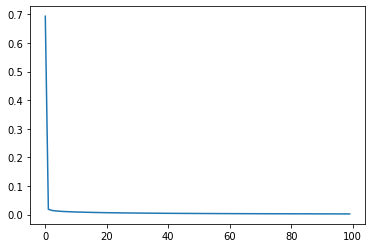

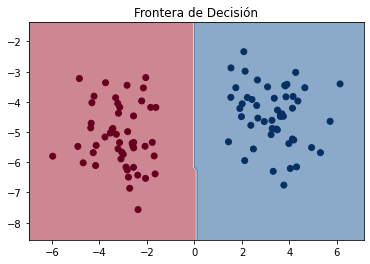

In [6]:
w1, w2, b, J = logisticRegression(X, Y, t=100, alpha=1) # Obtenemos los pesos entrenendo el modelo

print("w1 = " + str(w1))
print("w2 = " + str(w2))
print("b = " + str(b))
print("Exactitud del modelo: {:.2f} %".format(100 - np.mean(np.abs(predict(X, w1, w2, b) - Y)) * 100))

plt.figure(1)
plt.plot(J)

plt.figure(2)
plotDecisionBoundary(X, w1, w2, b) # Graficamos la frontera de decisión

# **Implemenatación Vectorizada**

Si bien este modelo es muy simple y no requiere mayor capacidad computacional, una vez el modelo comience a incrementar en complejidad o se busque entrenar con una mayor cantidad de datos, es preciso programarlo de manera mas eficiente. Una implementacion vectorizada permite ahorrar recursos computacionales, hacer el modelo mas versatil y adaptable a diferentes matrices de entrada, y reducir la cantidad de lineas de codigo.

In [7]:
# Entrenamiento del clasificador con implementacion vectorizada

def logisticRegressionVectorized(X, Y, t=100, alpha=0.1):

  # Definimos numero de ejemplos de entrenamiento y cantidad de entradas
  m = X.shape[0]
  n_x = X.shape[1]

  # Inicializamos pesos y bias
  W = np.zeros((n_x,1))
  b = 0

  X = X.T # Transponemos la matriz de entrada 'X' para facilitar los calculos
  Y = Y.reshape((1, Y.shape[0])) # Estandarizamos las dimensiones de 'Y' para ser (1, m)

  # Inicializamos los gradientes
  dW = np.zeros(n_x)
  dZ = np.zeros(m)
  db = 0

  J = []

  for i in range(t):

    Z = np.dot(W.T, X) + b
    A = 1/(1 + np.exp(-Z))

    # Guardamos los valores del costo en cada iteración
    cost = -(1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))) 
    J.append(cost)

    dZ = A - Y
    dW = (1/m)*(np.dot(X, dZ.T))
    db = (1/m)*np.sum(dZ)

    W = W - alpha*dW
    b = b - alpha*db

  return W, b, J

In [8]:
# Funcion para predecir nuevos datos

def predictVectorized(x, W, b):

  x = x.T

  Z = np.dot(W.T, x) + b
  y_pred = 1/(1 + np.exp(-Z))

  return y_pred

In [9]:
def plotDecisionBoundaryVectorized(X, W, b):

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  grid = np.c_[xx.ravel(), yy.ravel()]
  y_pred = predictVectorized(grid, W, b).reshape(xx.shape) 
  y_pred = y_pred > 0.5

  plt.contourf(xx, yy, y_pred, cmap="RdBu", alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
  plt.title("Frontera de Decisión")
  plt.show()

W = [[1.51122521]
 [0.03727077]]
b = 0.044817597053782715
Exactitud del modelo: 98.21 %


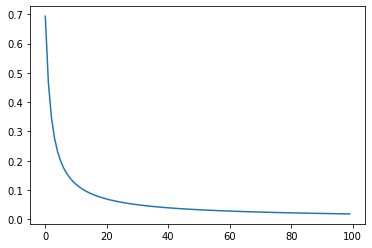

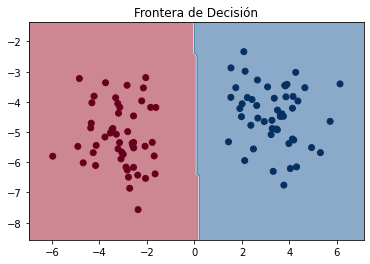

In [10]:
W, b, J = logisticRegressionVectorized(X, Y)

print("W = " + str(W))
print("b = " + str(b))
print("Exactitud del modelo: {:.2f} %".format(100 - np.mean(np.abs(predictVectorized(X, W, b) - Y)) * 100))

plt.figure(1)
plt.plot(J)

plt.figure(2)
plotDecisionBoundaryVectorized(X, W, b)

# **¿Que sucede si nuestros datos no pueden ser separados linealmente?**

Como pudimos observar en la seccion anterior en este cuaderno, el modelo de regresión logistica es capaz de crear una frontera de decisión lineal para clasificar dos clases a partir de una entrada. Sin embargo, ¿que pasaria se los datos no pueden separse linealmente?.

Generalmente los datos de problemas aplicables en la vida real no van a ser tan faciles de separar de manera lineal. Por esto a continuacion generaremos un dataset en el cual las clases no se pueden separar linealmente y aplicaremos el modelo de regresión logistica anterior a estos datos.

El tamaño de X es: (100, 2)
El tamaño de Y es: (100,)


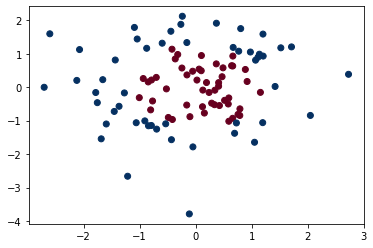

In [11]:
X, Y = datasets.make_gaussian_quantiles(n_classes=2) # Crea un dataset de prueba en 2D para clasificacion binaria

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
plt.show()

W = [[-0.34705398]
 [ 0.12401789]]
b = -0.01980472710386138
Exactitud del modelo: 51.71 %


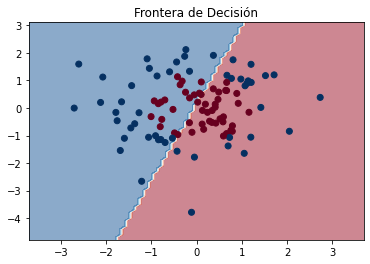

In [12]:
W, b, _ = logisticRegressionVectorized(X, Y)

print("W = " + str(W))
print("b = " + str(b))
print("Exactitud del modelo: {:.2f} %".format(100 - np.mean(np.abs(predictVectorized(X, W, b) - Y)) * 100))

plotDecisionBoundaryVectorized(X, W, b)

Como podemos observar el modelo no logra generar una frontera de decisión correcta para clasificar los datos, e independiente de cuanto entrenemos nuestro modelo siempre obtendremos una frontera lineal.

# **Regresión con Perceptron Simple (Opcional)**

En esta sección del cuaderno vamos a explorar como utilizar el modelo de perceptron simple para realizar regresión lineal sobre un conjunto de datos en 2D. 

1. En primer lugar generamos un dataset aleatorio con datos para realizar la regresión.

El tamaño de X es: (100, 1)
El tamaño de Y es: (100,)


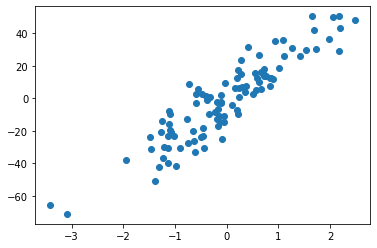

In [13]:
X, Y = datasets.make_regression(n_features=1, n_informative=1, noise=10) # Crea un dataset de prueba en 2D para regresión

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X, Y) # Grafica de los datos
plt.show()

2. Definimos nuestro modelo de regresión, el cual va a poseer la misma estructura que la regresión logistica solo que se va a omitir la funcion de activacion sigmoidal, y solamente se va a realizar la combinacion lineal de la entredas. A continuación se encuentra la estructura y ecuaciones del modelo.

<center>

$z = (\sum_{i=1}^{n_x} w_i x_i) + b$

</center>

En este cazo cambiamos la funcion de perdida de entropia cruzada por el error cuadratico medio.

<center>

$J(W, b) = \frac{1}{m} \sum_{i=1}^m (z^{\langle i \rangle} - y^{\langle i \rangle})^2$

</center>

Las reglas de aprendizaje siguen siendo las mismas que en el problema de clasificación.

<center>

$w_i = w_i - \alpha \frac{\partial J}{\partial w_i};\quad i = 1,...,n_x$

$b = b - \alpha \frac{\partial J}{\partial b}$

</center>

<center>

$\frac{\partial J}{\partial w_i} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial z}*\frac{\partial z}{\partial w_i}$

$\frac{\partial J}{\partial w_i} = \frac{1}{m} \sum_{i=1}^m (z^{\langle i \rangle} - y^{\langle i \rangle})x_i$

</center>

<center>

$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial z}*\frac{\partial z}{\partial b}$

$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (z^{\langle i \rangle} - y^{\langle i \rangle})$

</center>

In [14]:
def regression(X, Y, t=100, alpha=0.1):

  m = X.shape[0]
  n_x = X.shape[1]

  W = np.zeros((n_x,1))
  b = 0

  X = X.T

  dW = np.zeros(n_x)
  dZ = np.zeros(m)
  db = 0

  for i in range(t):

    Z = np.dot(W.T, X) + b

    dZ = 2*(Z - Y)
    dW = (1/m)*(np.dot(X, dZ.T))
    db = (1/m)*np.sum(dZ)

    W = W - alpha*dW
    b = b - alpha*db

  return W, b

3. Con el modelo definido creamos una funcion para predecir el valor de Y dada una entrada X.

In [15]:
def predictRegression(x, W, b):

  x = x.T

  y_pred = np.dot(W.T, x) + b

  return y_pred

4. Definimos una funcion para graficar el modelo de regresión.

In [16]:
def plotRegression():

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

  xx = np.linspace(x_min, x_max)
  xx = xx.reshape((xx.shape[0],1))
  y_pred = predictRegression(xx, W, b)

  plt.scatter(X, Y) # Grafica de los datos
  plt.plot(xx, y_pred.T, c='r') # Grafica de la regresión
  plt.show()  

W = [[21.47775842]]
b = -0.9024528567835789


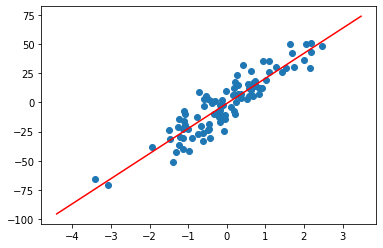

In [17]:
W, b = regression(X, Y, t=100)

print("W = " + str(W))
print("b = " + str(b))

plotRegression()

# **Reto**

Implementar regresión logistica utilizando la libreria de machine learning Scikit-Learn (sklearn).